<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/4Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
#df = df[df['n/m'] != 2]
print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

8750


In [2]:
X_modified = X.drop([ 'median', 'range',  'indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n','m'], axis = 1)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

     n    n/m   av.length     std.dev  min  max    k
0  100  10.00   59.610001   24.303177   20  100   50
1   44   2.75  123.045456   54.086475   10  234   41
2   40   2.00   90.125000   39.289970   21  197   36
3   80   5.00   74.275002   14.001787   50   99   39
4  162   3.00  393.987640  145.532776  163  643  140


In [3]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)
X_modified, y = oversample.fit_resample(X_modified, y.astype('int'))
print(X_modified.shape[0])

tmp = X_modified
tmp['y'] = y
tmp = tmp.sample(frac = 1).reset_index()
y = tmp['y']
X_modified = tmp.drop(['y'], axis = 1)

1655304


In [4]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({1120: 1416, 841: 1416, 3417: 1416, 584: 1416, 3001: 1416, 2313: 1416, 820: 1416, 1749: 1416, 2770: 1416, 204: 1416, 625: 1416, 810: 1416, 1374: 1416, 99999: 1416, 1940: 1416, 2003: 1416, 1474: 1416, 442: 1416, 35: 1416, 320: 1416, 3919: 1416, 47: 1416, 1165: 1416, 1668: 1416, 64: 1416, 2587: 1416, 1221: 1416, 770: 1416, 480: 1416, 308: 1416, 19: 1416, 344: 1416, 487: 1416, 1040: 1416, 185: 1416, 535: 1416, 1065: 1416, 2071: 1416, 569: 1416, 696: 1416, 788: 1416, 1489: 1416, 113: 1416, 2831: 1416, 986: 1416, 1469: 1416, 68: 1416, 403: 1416, 825: 1416, 3187: 1416, 1140: 1416, 3336: 1416, 48: 1416, 660: 1416, 751: 1416, 437: 1416, 183: 1416, 1234: 1416, 2655: 1416, 830: 1416, 96: 1416, 582: 1416, 692: 1416, 3655: 1416, 3901: 1416, 1248: 1416, 913: 1416, 49: 1416, 764: 1416, 2486: 1416, 2744: 1416, 3598: 1416, 99: 1416, 335: 1416, 324: 1416, 1: 1416, 1431: 1416, 900: 1416, 2949: 1416, 1194: 1416, 812: 1416, 287: 1416, 1011: 1416, 117: 1416, 332: 1416, 504: 1416, 135: 1416, 309: 14

In [5]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow
from tensorflow import keras 


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,1))
    return 99999*1/(1+K.exp(-x))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.1))

    #classifier.add(Dense(32, activation = 'relu'))
    #classifier.add(Dense(32, activation = 'relu'))
    #classifier.add(Dense(16, activation = 'relu'))

    #model.add(Dense(32, activation='relu'))

    #model.add(Dense(64, activation='relu'))

    #model.add(Dense(4, activation='relu'))
    
    model.add(Dense(1, activation = custom_activation))
    #model.add(Activation(custom_activation, name='SpecialActivation'))
    model.compile(loss='mean_squared_error', optimizer=tensorflow.keras.optimizers.Adam(clipnorm=1))
    #model.compile(loss='mean_squared_error', optimizer='RMSProp')

    return model

In [6]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)


X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=15, batch_size=128, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train)
#plt.plot(history.history['val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/15
10734/10734 [==============================] - 30s 3ms/step - loss: 17702042.0000
Epoch 2/15
10734/10734 [==============================] - 18s 2ms/step - loss: 6617765.0000
Epoch 3/15
10734/10734 [==============================] - 18s 2ms/step - loss: 2344475.0000
Epoch 4/15
10734/10734 [==============================] - 18s 2ms/step - loss: 1948597.0000
Epoch 5/15
10734/10734 [==============================] - 20s 2ms/step - loss: 1884273.0000
Epoch 6/15
10734/10734 [==============================] - 19s 2ms/step - loss: 1771069.8750
Epoch 7/15
10734/10734 [==============================] - 18s 2ms/step - loss: 1844238.5000
Epoch 8/15
10734/10734 [==============================] - 18s 2ms/step - loss: 1851851.1250
Epoch 9/15
10734/10734 [==============================] - 18s 2ms/step - loss: 1852175.1250
Epoch 10/15
10734/10734 [==============================] - 18s 2ms/step - loss: 1898808.3750
Epoch 11/15
10734/10734 [==============================] - 18s 2ms/step - loss

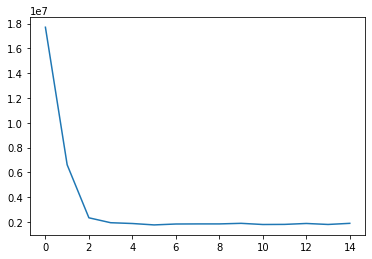

In [7]:
plt.plot(history.history['loss'])

In [8]:
#from sklearn.metrics import r2_score
#prediction = estimator.predict(X_val)
#print("r_square score: ", r2_score(y_val,prediction))
##y_test = sc2.inverse_transform(y_test.reshape(-1,1))
#yy = np.array(y_val)
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
#predd = np.array(prediction)
#for i in range(len(yy)):
#  if(yy[i]-predd[i] > 99000):
#    print("real value of y_test: " + str(yy[i]) + " -> the predict: " + str(predd[i]))

In [9]:
#from sklearn.metrics import mean_squared_error
#from math import sqrt

#print("RMSE:")
#sqrt(mean_squared_error(yy, predd)) 

In [15]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)


av_bad = []
n_bad = []
std_dev_bad = []
max_bad = []
nm_bad = []
k_bad = []
min_bad = []

av_good = []
n_good = []
std_dev_good = []
nm_good = []
max_good = []
k_good = []
min_good = []

for i in range(len(yy)):
  if(yy[i]-predd[i] > 99000):
    av_bad.append(X_test_copy.iloc[i]['av.length'])
    n_bad.append(X_test_copy.iloc[i]['n'])
    std_dev_bad.append(X_test_copy.iloc[i]['std.dev'])
    nm_bad.append(X_test_copy.iloc[i]['n/m'])
    max_bad.append(X_test_copy.iloc[i]['max'])
    k_bad.append(X_test_copy.iloc[i]['k'])
    min_bad.append(X_test_copy.iloc[i]['min'])

    print("real value of y_test: " + str(yy[i]) + " -> the predict: " + str(predd[i]))
  if(abs(yy[i]-predd[i])<10):
    av_good.append(X_test_copy.iloc[i]['av.length'])
    n_good.append(X_test_copy.iloc[i]['n'])
    std_dev_good.append(X_test_copy.iloc[i]['std.dev'])
    nm_good.append(X_test_copy.iloc[i]['n/m'])
    max_good.append(X_test_copy.iloc[i]['max'])
    k_good.append(X_test_copy.iloc[i]['k'])
    min_good.append(X_test_copy.iloc[i]['min'])



2199/2199 [==============================] - 3s 1ms/step
r_square score:  0.8265593880947955
real value of y_test: 99999 -> the predict: 44.187714
real value of y_test: 99999 -> the predict: 37.91539
real value of y_test: 99999 -> the predict: 374.51926
real value of y_test: 99999 -> the predict: 407.19492
real value of y_test: 99999 -> the predict: 245.75314
real value of y_test: 99999 -> the predict: 39.23355
real value of y_test: 99999 -> the predict: 889.5436
real value of y_test: 99999 -> the predict: 32.96302


In [11]:
print(np.max(predd))

99999.0


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd)) 

RMSE:


1303.3318955997454

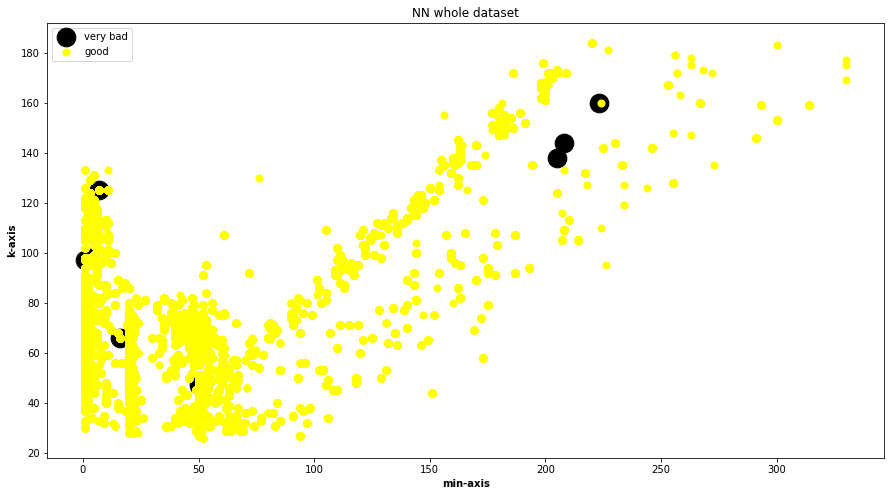

In [17]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()

ax.scatter(min_bad, k_bad, s = 350, color = 'black')
ax.scatter(min_good, k_good, s= 50, color = 'yellow')

ax.set_xlabel('min-axis', fontweight ='bold')
ax.set_ylabel('k-axis', fontweight ='bold')
plt.title("NN whole dataset")
 
ax.legend(['very bad', 'good'])
# show plot
plt.show()

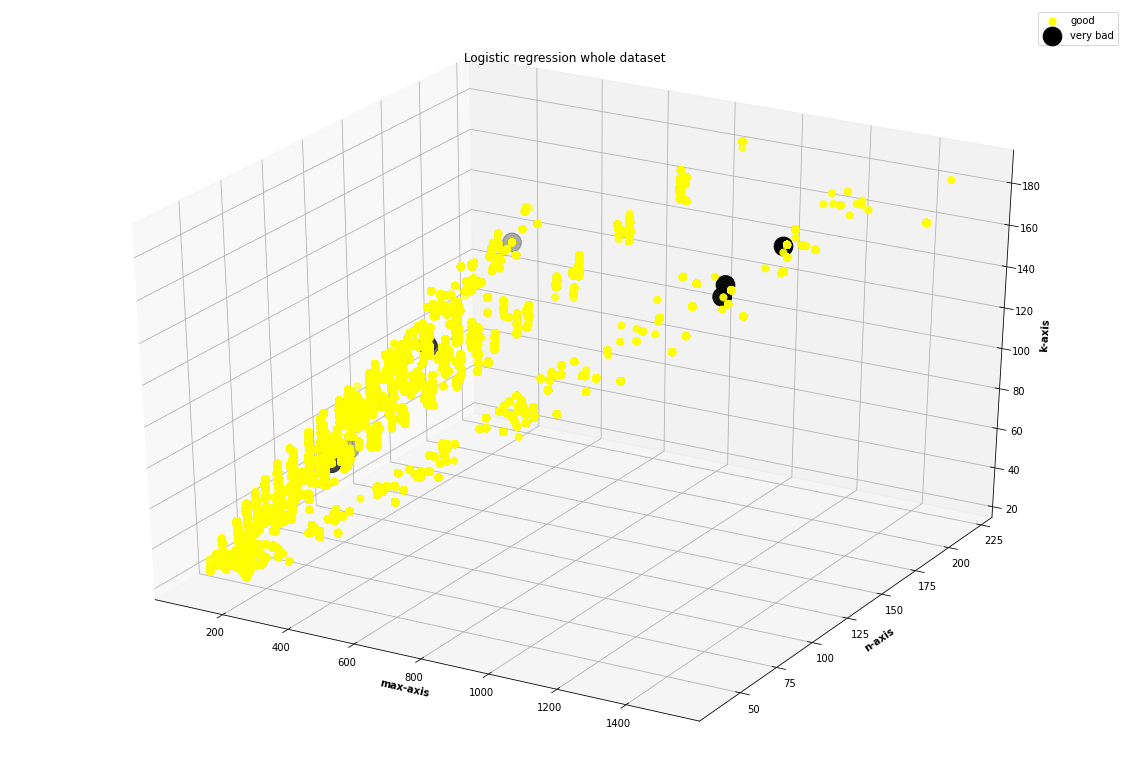

In [14]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (20, 14))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

ax.scatter3D(max_good, n_good, k_good, s = 50, color = 'yellow')
ax.scatter3D(max_bad, n_bad, k_bad, s = 350, color = 'black')


plt.title("Logistic regression whole dataset")
ax.set_xlabel('max-axis', fontweight ='bold')
ax.set_ylabel('n-axis', fontweight ='bold')
ax.set_zlabel('k-axis', fontweight ='bold')
ax.legend(['good', 'very bad'])
 
# show plot
plt.show()